# Kernel herding examples
The aim of this notebook is to provide simple examples to apply kernel herding on multivariate random inputs with or without a dependency structure.

In [1]:
%matplotlib inline

In [2]:
import openturns as ot
import otkerneldesign as otkd
from plotools import *

In [3]:
from matplotlib import rc, rcParams, style
style.use('default')
rcParams['text.usetex'] = True
#rcParams['text.latex.unicode'] = True
rc('font', **{'family': 'Palatino'})
rc('text', usetex=True)
rc('font', size=16)# Set the default text font size
rc('axes', titlesize=20)# Set the axes title font size
rc('axes', labelsize=16)# Set the axes labels font size
rc('xtick', labelsize=14)# Set the font size for x tick labels
rc('ytick', labelsize=16)# Set the font size for y tick labels
rc('legend', fontsize=16)# Set the legend font size
#rc('figure', titlesize='xx-large')# Set the font size of the figure title

## Independent bivariate random mixture

In [4]:
# Random input variable definition
unifrom = ot.Uniform(0., 1.)
distribution = ot.ComposedDistribution([unifrom] * 2)

In [5]:
dimension = distribution.getDimension()
size = 200
# Monte Carlo design
mc_design = distribution.getSample(size)
# Kernel definition
theta = 0.05
ker_list = [ot.MaternModel([theta], [1.0], 2.5)] * dimension
kernel = ot.ProductCovarianceModel(ker_list)
# Kernel herding design
kh = otkd.KernelHerding(
    kernel=kernel,
    candidate_set_size=2 ** 12,
    distribution=distribution
)
kh_design, kh_indexes = kh.select_design(size)
# Tensorized kernel herding design
kht = otkd.KernelHerdingTensorized(
    kernel=kernel,
    candidate_set_size=2 ** 12,
    distribution=distribution
)
kht_design, kht_indexes = kht.select_design(size)

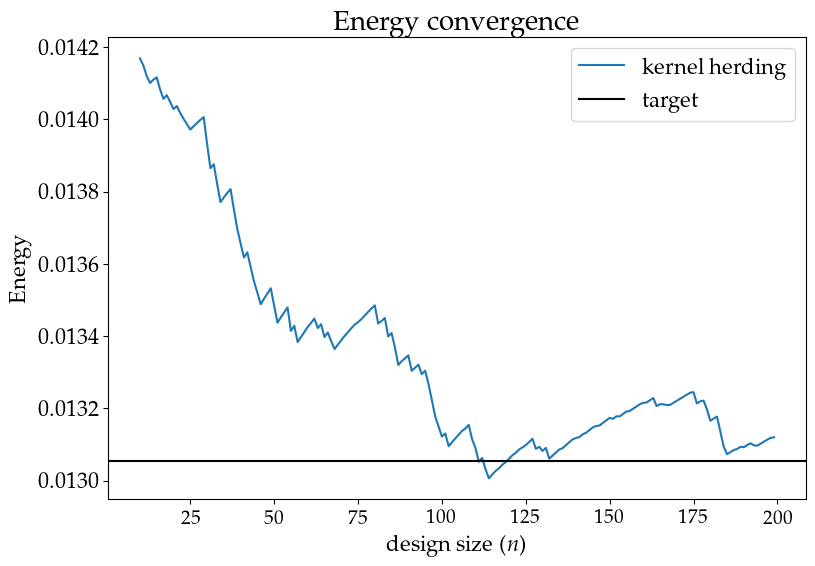

In [6]:
fig1, plot_data1 = kh.draw_energy_convergence(kh_indexes)
fig1

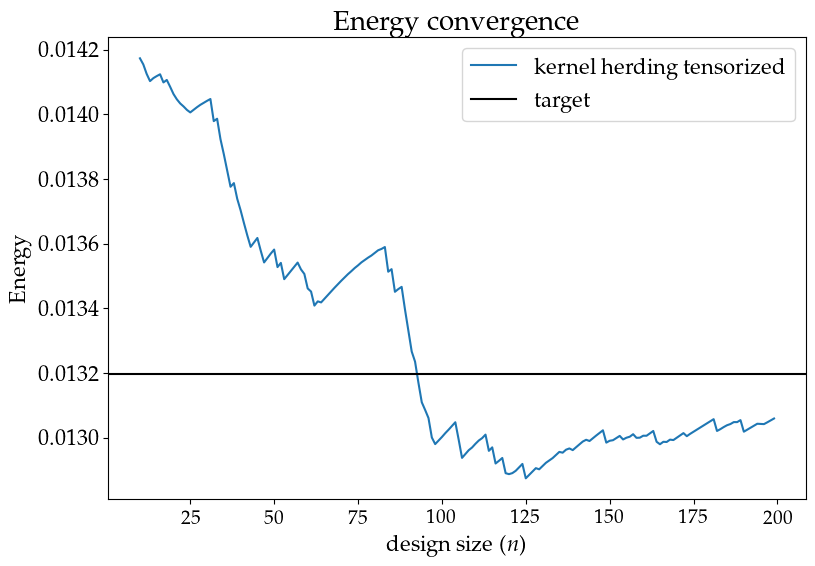

In [7]:
fig2, plot_data2 = kht.draw_energy_convergence(kht_indexes)
fig2

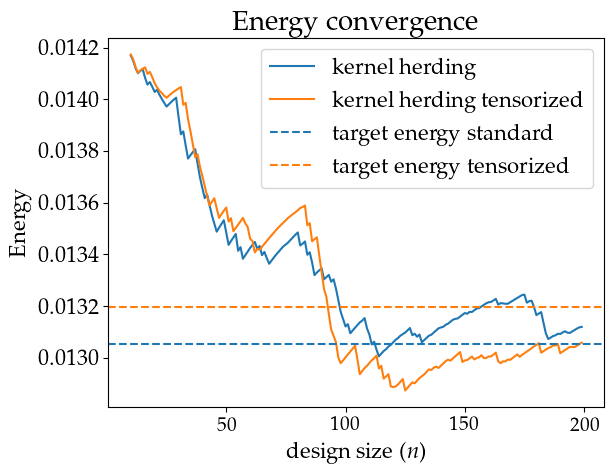

In [15]:
fig3, ax3 = plt.subplots(1,sharey=True, sharex=True)
# Plot data from fig1 and fig2
ax3.plot(plot_data1.get_data()[0], plot_data1.get_data()[1], label=kh._method_label)
ax3.plot(plot_data2.get_data()[0], plot_data2.get_data()[1], label=kht._method_label)
ax3.axhline(kh._target_energy, color='C0', linestyle='dashed', label='target energy standard')
ax3.axhline(kht._target_energy, color='C1', linestyle='dashed', label='target energy tensorized')
ax3.set_title('Energy convergence')
ax3.set_xlabel('design size ($n$)')
ax3.set_ylabel('Energy')
ax3.legend(loc='best');